In [1]:
'''Permite remontar o genoma usando Eulerian Walks.
O downside é que parte do pressuposto que os kmers  nao se repetem (1 read por kmer), algo improvavel num genoma real.
Alem disso, pode haver casos que pode resultar em mais de um caminho no grafo, ou seja, o grafo nao sera euleriano'''
from networkx import nx
import matplotlib.pyplot as plt

In [2]:
def de_bruijn(st, k):
    'st: string que sera dividida em kmers de tamanho k'
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges
    

In [3]:
nodes, edges = de_bruijn('ACGCGTCG', 3)

In [4]:
print(edges)

[('AC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TC'), ('TC', 'CG')]


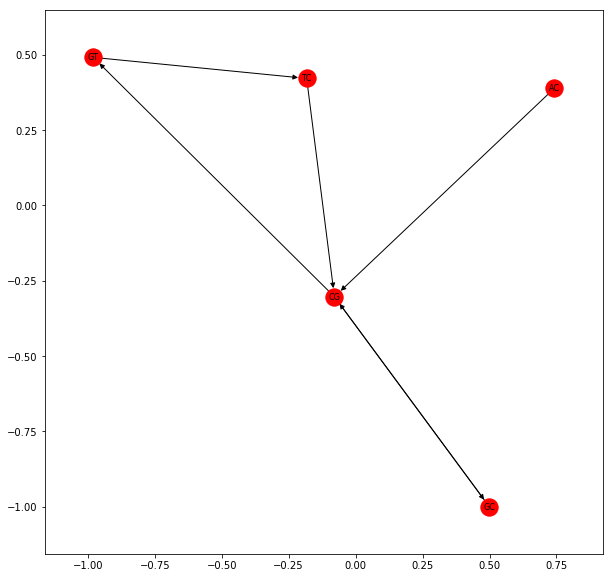

In [5]:
# exibe o grafo
G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos,font_size=8)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()